# 📖 [LMX Tutorial] Absolute and Relative motion (in C++)

Based on the following WMX API document:

http://download.movensys.com:8222/doc/wmx3/en/html/api/page_WMXDOC_TUTORIAL_SEC3_1_ABS_REL.html

### 📢Important note about xeus-cling
A Jupyter kernel for C++ based on the `cling` C++ interpreter and the `xeus` native implementation of the Jupyter protocol, xeus.

To understand how the xeus-clang works, please try to run the following sample notebook provided by xeus-cling in advance.

Link to [xeus-cling notebook sample](xeus-cling-notebooks/xcpp.ipynb)

### ⭐ Include the following LMX cling header file to use WMX libraries

In [ ]:
// This header lets cling knows how to load WMX3 API libraries
#include <lmx/lmx_cling_config.hpp>

## Import WMX library and Initialize a WMX3 API device

Note that the a utility class `WmxUtil` is initialized here.

In [ ]:
// Include this utility header where includes WMX3 headers as well as some utility functions
#include "WMX3UtilClang.hpp"

// When all the devices are done, the WMX3 engine will also terminate.
WMX3Api wmx3Lib;
CoreMotionStatus cmStatus;
CoreMotion wmx3LibCore(&wmx3Lib);

// Declare global variables used in subsequent code
int     ret;
char    errString[256];
Motion::PosCommand pos;

std::cout << "Program Starts..." << std::endl;

// Create device.
ret = wmx3Lib.CreateDevice("/opt/lmx/", DeviceType::DeviceTypeNormal, INFINITE);
if (ret != ErrorCode::None) {
    std::cerr << "Failed to execute CreateDevice. Error=" << ret << std::endl;
    throw std::runtime_error("WMX API exception");
}

std::cout << "CreateDevice succeeded!" << std::endl;

// Initialize WMX3 Clang Utility
wmxclang::WmxUtil wmx3ClangUtil(&wmx3Lib);

Program Starts...
CreateDevice succeeded!
A WmxUtil instance is created.


## Set the device name and start communication

In [3]:
// Set Device Name.
wmx3Lib.SetDeviceName("MotorControl");
if (ret != ErrorCode::None) {
    std::cerr << "Failed to execute SetDeviceName. Error=" << ret << std::endl;
    throw std::runtime_error("WMX API exception");
}

// Start Communication.
wmx3Lib.StartCommunication(INFINITE);
if (ret != ErrorCode::None) {
    std::cerr << "Failed to execute StartCommunication. Error=" << ret << std::endl;
    throw std::runtime_error("WMX API exception");
}

std::cout << "StartCommunication succeeded!" << std::endl;

StartCommunication succeeded!


In [4]:
// Get DevicesInfo to determine the type of device currently created
wmx3Api::DevicesInfoA devInfo;

// Set wmx3Lib Name.
ret = wmx3Lib.GetAllDevices(&devInfo);
if (ret != ErrorCode::None) {
    std::cerr << "Failed to execute GetAllDevices. Error=" << ret << std::endl;
    throw std::runtime_error("WMX API exception");
}

std::cout << "device Id : " << devInfo.devices[0].id << " Name : " << devInfo.devices[0].name << std::endl;


device Id : 0 Name : MotorControl


## Set servo ON ▶️

In [5]:
// Set servo on.
wmx3LibCore.axisControl->SetServoOn(0, 1);
while (true)
{
    wmx3LibCore.GetStatus(&cmStatus);
    if (cmStatus.axesStatus[0].servoOn)
    {
        break;
    }

    Sleep(100);
}

## 1. Absolute position command (`StartPos`)

Refer to the following API documentation:

http://download.movensys.com:8222/doc/wmx3/en/html/api/classwmx3_api_1_1_motion.html#_CPPv4N7wmx3Api6Motion8StartPosEjP17TriggerPosCommand

In [20]:
//Set position command parameters
pos.axis = 0;
pos.profile.type = ProfileType::Trapezoidal;
pos.profile.velocity = 2000;
pos.profile.acc = 500;
pos.profile.dec = 500;

uint8_t logChannel = wmx3ClangUtil.startLog();
if (logChannel < 0) {
    throw std::runtime_error("Failed to execute startLog");
}

//Execute absolute position command to 10000
pos.target = 10000;
ret = wmx3LibCore.motion->StartPos(&pos);
if (ret != ErrorCode::None) {
    wmx3LibCore.ErrorToString(ret, errString, sizeof(errString));
    std::cerr << "Failed to execute StartPos. Error=" << ret << " (" << errString << ")" << std::endl;
    throw std::runtime_error("WMX API exception");
}

//Block execution until motion is finished
ret = wmx3LibCore.motion->Wait(0);
if (ret != ErrorCode::None) {
    wmx3LibCore.ErrorToString(ret, errString, sizeof(errString));
    std::cerr << "Failed to execute Wait. Error=" << ret << " (" << errString << ")" << std::endl;
    throw std::runtime_error("WMX API exception");
}

wmx3ClangUtil.pauseLog(logChannel);

curChannel: 7
MemoryLog thread stopped.
LogDataHistory: 4900 entries, overflow: FALSE


### 1.1 Draw the position and velocity plots for relative motion 📈

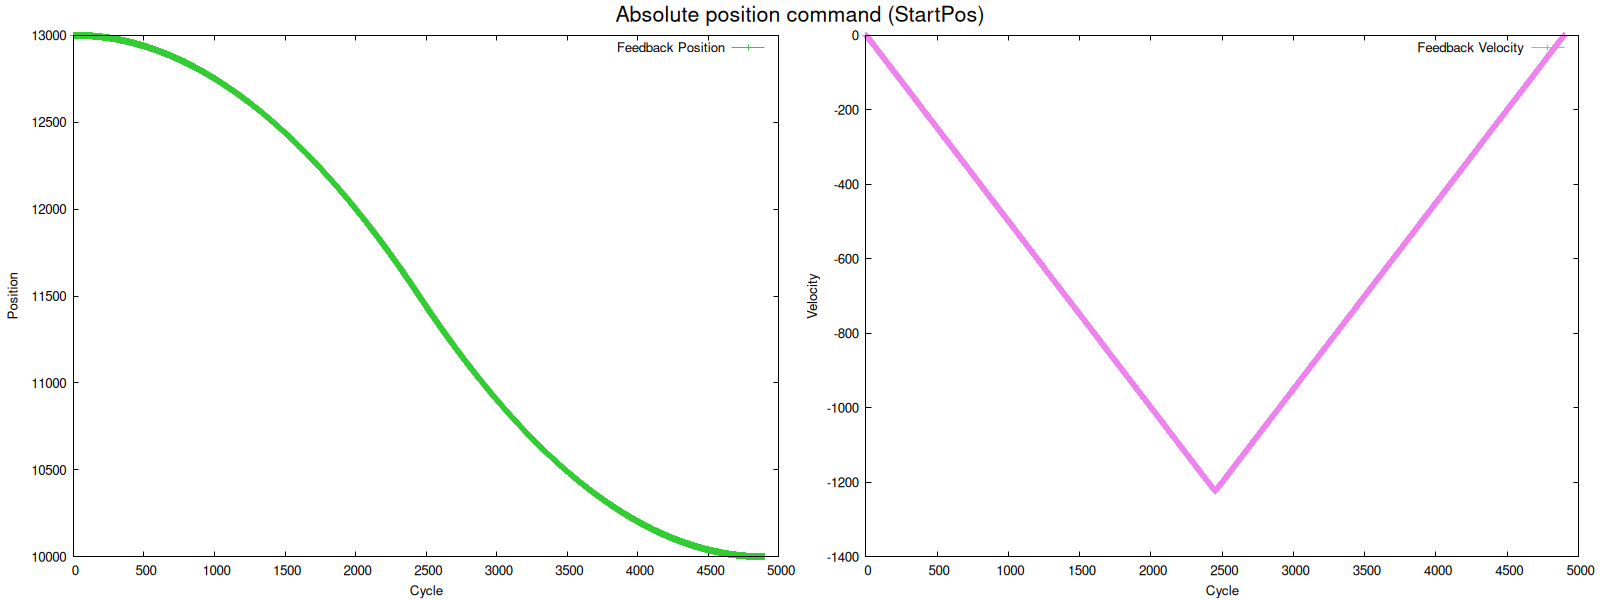

In [21]:
wmx3ClangUtil.drawPlots("Absolute position command (StartPos)", "startpos_result.png");
xcpp::clear_output(true);  // Clear output with preventing flickering
im::image logplot("startpos_result.png");
logplot

## 2. Relative position command (`StartMov`)

Refer to the following API documentation:

http://download.movensys.com:8222/doc/wmx3/en/html/api/classwmx3_api_1_1_motion.html#_CPPv4N7wmx3Api6Motion8StartMovEP10PosCommand

In [18]:
//Set position command parameters
pos.target = 1000;
pos.profile.velocity = 200;
pos.profile.acc = 50;
pos.profile.dec = 50;

uint8_t logChannel = wmx3ClangUtil.startLog();
if (logChannel < 0) {
    throw std::runtime_error("Failed to execute startLog");
}

//Execute absolute position command to 10000
ret = wmx3LibCore.motion->StartMov(&pos);
if (ret != ErrorCode::None) {
    wmx3LibCore.ErrorToString(ret, errString, sizeof(errString));
    std::cerr << "Failed to execute StartMov. Error=" << ret << " (" << errString << ")" << std::endl;
    throw std::runtime_error("WMX API exception");
}

//Block execution until motion is finished
ret = wmx3LibCore.motion->Wait(0);
if (ret != ErrorCode::None) {
    wmx3LibCore.ErrorToString(ret, errString, sizeof(errString));
    std::cerr << "Failed to execute Wait. Error=" << ret << " (" << errString << ")" << std::endl;
    throw std::runtime_error("WMX API exception");
}

wmx3ClangUtil.pauseLog(logChannel);

curChannel: 7
MemoryLog thread stopped.
LogDataHistory: 9000 entries, overflow: FALSE


### 1.1 Draw the position and velocity plots for relative motion 📈

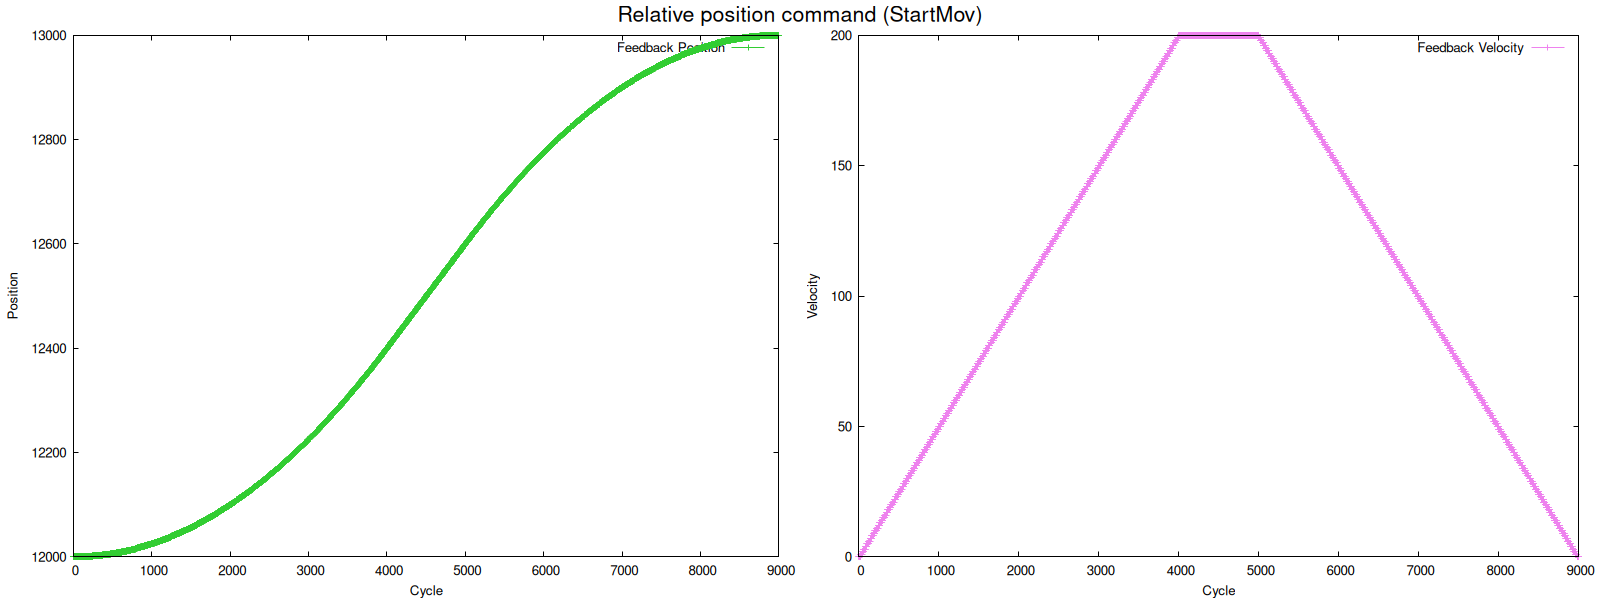

In [19]:
wmx3ClangUtil.drawPlots("Relative position command (StartMov)", "startmov_result.png");
xcpp::clear_output(true);  // Clear output with preventing flickering
im::image logplot("startmov_result.png");
logplot

## Set servo OFF ⏹️

In [14]:
// Set servo on.
wmx3LibCore.axisControl->SetServoOn(0, 0);
while (true)
{
    wmx3LibCore.GetStatus(&cmStatus);
    if (!cmStatus.axesStatus[0].servoOn)
    {
        break;
    }

    Sleep(100);
}

## Stop communication and close the WMX3 API device

In [15]:
    // Stop Communication.
    wmx3Lib.StopCommunication(INFINITE);

    //close device.
    wmx3Lib.CloseDevice();